In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('geography.csv')

In [5]:
df.head(100)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2023-01,SC,45,GREENVILLE,45045.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
1,2020-11,TN,47,LAWRENCE,47099.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
2,2022-09,SC,45,LEXINGTON,45063.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
3,2022-11,IL,17,MONTGOMERY,17135.0,65+ years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN
4,2020-07,IL,17,MORGAN,17137.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-02,KY,21,MADISON,21151.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Clinical evaluation,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,No,NaN
96,2021-09,KY,21,WOODFORD,21239.0,50 to 64 years,Male,White,Non-Hispanic/Latino,0.0,0.0,Provider reported,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
97,2022-07,MT,30,FLATHEAD,30029.0,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
98,2021-07,ME,23,WALDO,23027.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Clinical evaluation,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [6]:
df['county_fips_code'].value_counts()

12023.0    58
42015.0    58
13031.0    58
4019.0     58
40111.0    58
           ..
37141.0    56
39039.0    56
21073.0    56
28099.0    33
28035.0     5
Name: county_fips_code, Length: 1752, dtype: int64

### Count Total Cases Per Month of a County

In [7]:
def total_cases_by_month(df, county_fips_code):
    specific_county = df[df['county_fips_code'] == county_fips_code]
    monthly_counts = specific_county.groupby('case_month').size()
    return monthly_counts

In [8]:
total_cases_by_month(df, 28099.0)

case_month
2020-05    33
dtype: int64

### Check if a County has at Least 5 Months of Data

In [9]:
def check_data(df, county_fips_code):
    # Filter dataframe for rows where 'county_fips_code' matches the input
    specific_county = df[df['county_fips_code'] == county_fips_code]
    
    # Check if there are 5 or more unique months
    if specific_county['case_month'].nunique() >= 5:
        print('Nice! Has 5 or more unique months')
    else:
        print('Bad! Less than 5 months data!')

In [10]:
check_data(df, 28099.0)

Bad! Less than 5 months data!


### Printing All Counties that Have 5 or More Months of Data

In [11]:
unique_counties = df['county_fips_code'].unique()

# Iterate over all unique 'county_fips_code' and check data for each
for county in unique_counties:
    specific_county = df[df['county_fips_code'] == county]
    if specific_county['case_month'].nunique() >= 5:
        print(f"County {county} has 5 or more months of data.")

County 17135.0 has 5 or more months of data.
County 51540.0 has 5 or more months of data.
County 40079.0 has 5 or more months of data.
County 55039.0 has 5 or more months of data.
County 2090.0 has 5 or more months of data.
County 48181.0 has 5 or more months of data.
County 21239.0 has 5 or more months of data.
County 23027.0 has 5 or more months of data.
County 44009.0 has 5 or more months of data.
County 48373.0 has 5 or more months of data.
County 47131.0 has 5 or more months of data.
County 48489.0 has 5 or more months of data.
County 47047.0 has 5 or more months of data.
County 22041.0 has 5 or more months of data.
County 13085.0 has 5 or more months of data.
County 47159.0 has 5 or more months of data.
County 37023.0 has 5 or more months of data.
County 53039.0 has 5 or more months of data.
County 9007.0 has 5 or more months of data.
County 48219.0 has 5 or more months of data.
County 5131.0 has 5 or more months of data.
County 1113.0 has 5 or more months of data.
County 26129.0

### Create a Filtered DataFrame with Counties with 5+ Months Data

In [12]:
# Initialize an empty DataFrame to store the result
filtered_df = pd.DataFrame()

# Iterate over all unique 'county_fips_code' and check data for each
for county in unique_counties:
    specific_county = df[df['county_fips_code'] == county]
    if specific_county['case_month'].nunique() >= 5:
        filtered_df = pd.concat([filtered_df, specific_county])

In [13]:
filtered_df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
3,2022-11,IL,17,MONTGOMERY,17135.0,65+ years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN
1759,2022-11,IL,17,MONTGOMERY,17135.0,65+ years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN
3527,2022-11,IL,17,MONTGOMERY,17135.0,65+ years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Probable Case,Missing,No,Missing,Missing,NaN
5290,2022-11,IL,17,MONTGOMERY,17135.0,65+ years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Missing,NaN
8087,2022-11,IL,17,MONTGOMERY,17135.0,65+ years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91269,2022-08,TN,47,HENDERSON,47077.0,0 - 17 years,Female,White,Missing,0.0,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN
94006,2023-01,TN,47,HENDERSON,47077.0,50 to 64 years,Female,NaN,NaN,0.0,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN
94775,2022-08,TN,47,HENDERSON,47077.0,0 - 17 years,Female,White,Missing,0.0,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN
97504,2023-01,TN,47,HENDERSON,47077.0,50 to 64 years,Female,NaN,NaN,0.0,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN


In [14]:
filtered_df['county_fips_code'].value_counts()

22031.0    58
26129.0    58
39175.0    58
42061.0    58
29209.0    58
           ..
6009.0     56
18181.0    56
36027.0    56
9001.0     56
47077.0    56
Name: county_fips_code, Length: 170, dtype: int64

In [15]:
# List of Counties with Enough Data

filtered_counties = filtered_df['county_fips_code'].unique()
print(filtered_counties)

[17135. 51540. 40079. 55039.  2090. 48181. 21239. 23027. 44009. 48373.
 47131. 48489. 47047. 22041. 13085. 47159. 37023. 53039.  9007. 48219.
  5131.  1113. 26129. 31157. 40097. 48253.  8107. 39175. 42061. 45011.
 39077. 39149. 17021. 39171. 48497. 42119. 18067. 41033. 29215.  1071.
 12093. 26109. 40009. 22101. 45069. 51117. 51670.  1055. 32007. 20103.
 17183. 45021. 27079. 13009. 17073. 37197. 48485. 13107. 12085. 51590.
 21211. 37139. 18035.  6005. 36001. 51069. 21145. 55089. 46081.  8077.
 22031.  6093. 41013. 22113. 18153. 51027.  1059. 37149. 36123. 13157.
 39139. 37017. 29091. 48309. 27105. 13153. 40145. 24011. 51099. 17117.
 13033.  5091. 16017. 27027. 18077. 21089.  1007. 37031. 45029.  1127.
 40135. 42077.  8039. 51127. 46135. 48459. 40123.  8119. 51600. 53041.
 25009. 27103.  8087. 51137. 13321.  1005. 18073. 48025. 36121. 53065.
 13115. 37117. 47133. 42013.  2122. 35055. 39081. 39011. 39007.  1053.
 18175. 41057. 48185. 48053. 21081. 21027.  8015. 13127. 48227.  1061.
 29209

In [39]:
sns.set()

# import rcParams
import matplotlib

# Set font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Change the default dpi of figures to prevent blurry results
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

def plot_county_cases(df, county_fips_code):
    
    # Filter dataframe for rows where 'county_fips_code' matches the input
    specific_county = df[df['county_fips_code'] == county_fips_code]

    # Group by 'case_month' and count the number of cases for each month
    monthly_counts = specific_county.groupby('case_month').size()

    # Plot the result
    plt.figure(figsize=(10,6))
    plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='red')

    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Cases', fontsize=14)
    plt.title(f'Number of Cases per Month for County: {county_fips_code}', fontsize=16)
    plt.grid(True)
    plt.show()

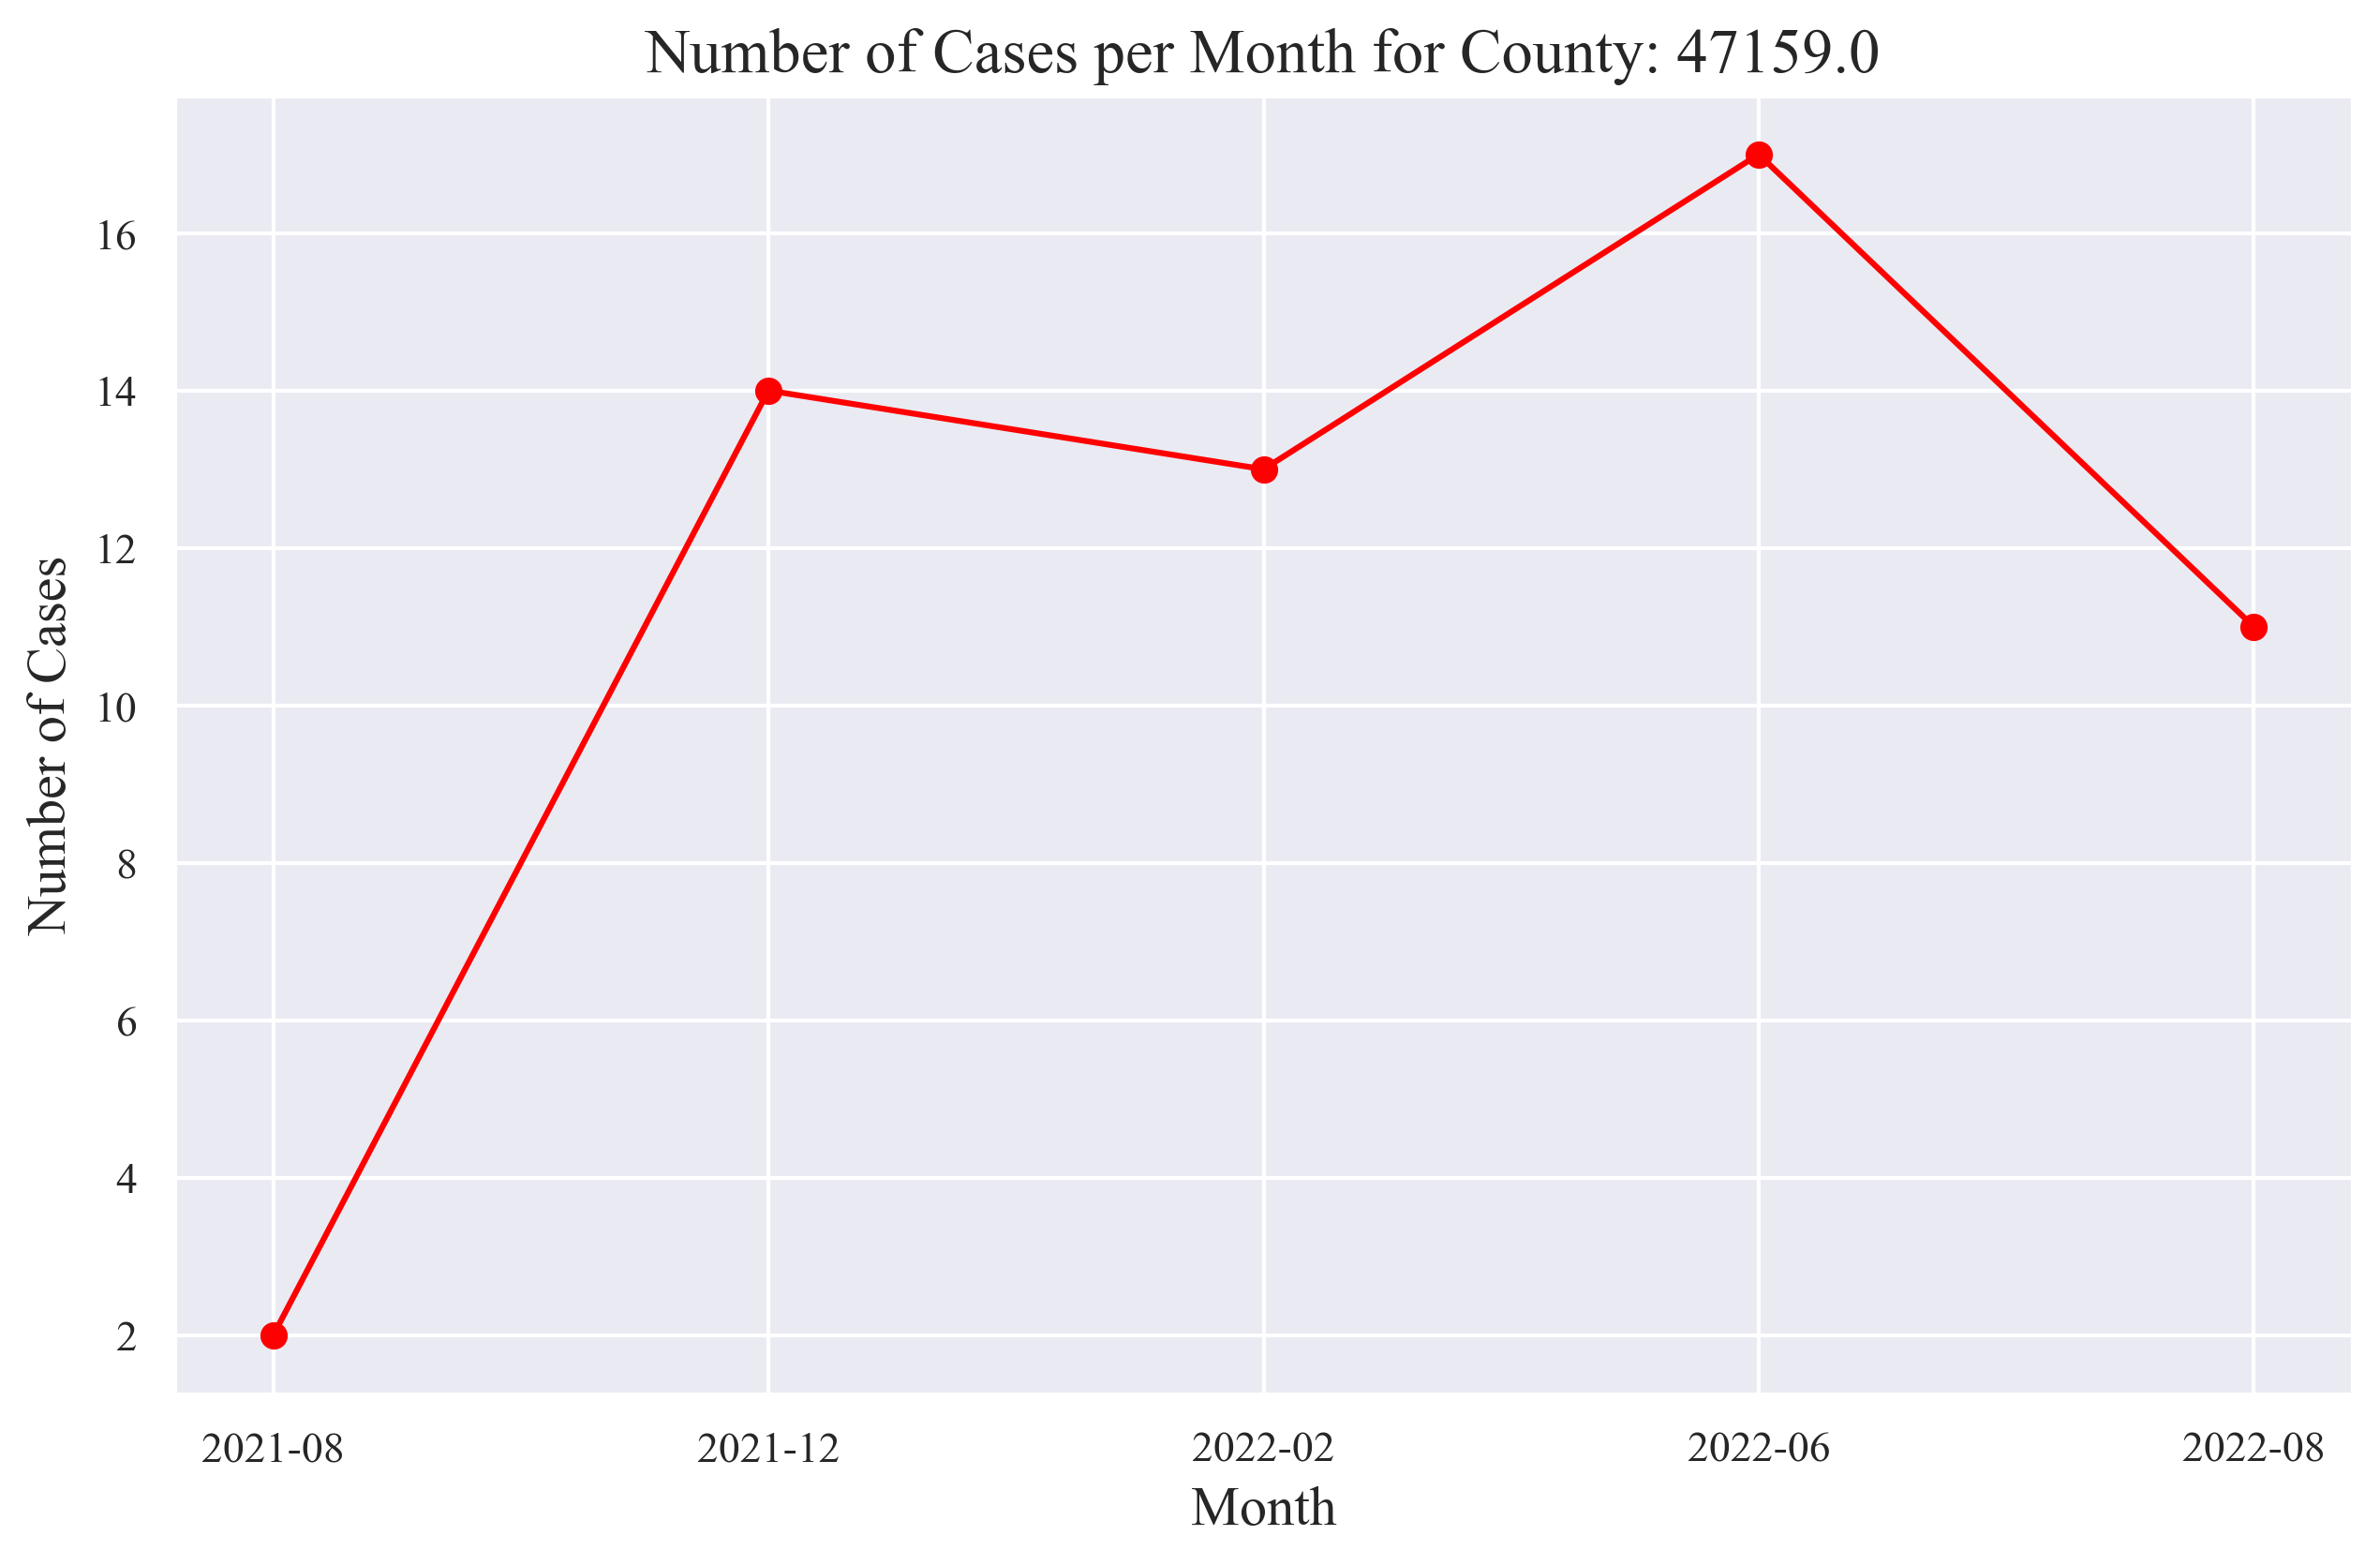

In [41]:
plot_county_cases(df, 47159.0)